# Thống kê mô tả dữ liệu bệnh tiểu đường (Pima Indians Diabetes Dataset)


## 1.Mở bài

Dữ liệu **Pima Indians Diabetes Dataset** là một tập dữ liệu y tế dùng để dự đoán nguy cơ mắc tiểu đường (Outcome).  

Mục tiêu notebook này là thực hiện **thống kê mô tả**, giúp người mới hiểu dữ liệu trước khi làm **EDA, xử lý missing value, tạo feature, và xây dựng mô hình Machine Learning**.




## 2.Load thư viện và dữ liệu

In [ ]:
# 2. Load thư viện và dữ liệu

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load dữ liệu
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3.Tổng quan dữ liệu

### 1.Xem 5 dòng đầu

In [ ]:
# Xem 5 dòng đầu
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.Thông tin dữ liệu

In [ ]:
# Thông tin dữ liệu
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3.Biến mục tiêu (Outcome)

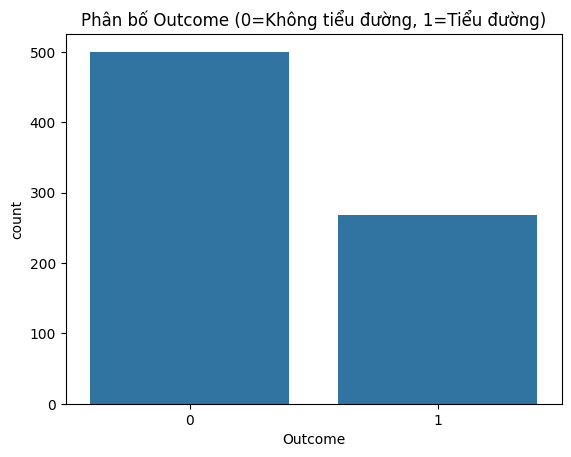

,count
Outcome,
0,500
1,268


In [ ]:
# Biến mục tiêu Outcome
sns.countplot(x='Outcome', data=data)
plt.title('Phân bố Outcome (0=Không tiểu đường, 1=Tiểu đường)')
plt.show()

data['Outcome'].value_counts()


## 4.Xử lý giá trị thiếu

In [ ]:
# 4. Xử lý giá trị thiếu

cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

# Kiểm tra missing values
data.isnull().sum()

# Điền giá trị thiếu
for col in ['Glucose','BloodPressure','SkinThickness','BMI']:
    data[col].fillna(data[col].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)


## 5.Thống kê mô tả từng biến

In [ ]:
cols = data.columns[:-1]

### 1.Mean, Median, Mode, Range

In [ ]:
for col in cols:
    print(f"--- {col} ---")
    print("Mean:", data[col].mean())
    print("Median:", data[col].median())
    print("Mode:", data[col].mode()[0])
    print("Range:", data[col].max() - data[col].min())
    print("\n")

--- Pregnancies ---
Mean: 3.8450520833333335
Median: 3.0
Mode: 1
Range: 17


--- Glucose ---
Mean: 121.65625
Median: 117.0
Mode: 99.0
Range: 155.0


--- BloodPressure ---
Mean: 72.38671875
Median: 72.0
Mode: 72.0
Range: 98.0


--- SkinThickness ---
Mean: 29.108072916666668
Median: 29.0
Mode: 29.0
Range: 92.0


--- Insulin ---
Mean: 155.54822335025383
Median: 155.5482233502538
Mode: 155.5482233502538
Range: 832.0


--- BMI ---
Mean: 32.45520833333333
Median: 32.3
Mode: 32.3
Range: 48.89999999999999


--- DiabetesPedigreeFunction ---
Mean: 0.47187630208333325
Median: 0.3725
Mode: 0.254
Range: 2.342


--- Age ---
Mean: 33.240885416666664
Median: 29.0
Mode: 22
Range: 60




### 2.Variance và Standard Deviation

In [ ]:
for col in cols:
    print(f"--- {col} ---")
    print("Variance:", data[col].var())
    print("Standard Deviation:", data[col].std())
    print("\n")

--- Pregnancies ---
Variance: 11.35405632062142
Standard Deviation: 3.3695780626988623


--- Glucose ---
Variance: 926.4892438070405
Standard Deviation: 30.43828582241517


--- BloodPressure ---
Variance: 146.32874124022163
Standard Deviation: 12.096641733978139


--- SkinThickness ---
Variance: 77.28556707681494
Standard Deviation: 8.791221023089737


--- Insulin ---
Variance: 7228.588766305534
Standard Deviation: 85.02110776922125


--- BMI ---
Variance: 47.26805627987832
Standard Deviation: 6.875176818080996


--- DiabetesPedigreeFunction ---
Variance: 0.10977863787313938
Standard Deviation: 0.33132859501277484


--- Age ---
Variance: 138.30304589037365
Standard Deviation: 11.76023154067868




### 3.Percentiles và IQR

In [ ]:
for col in cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    print(f"--- {col} ---")
    print("25%:", q1)
    print("50% (median):", data[col].median())
    print("75%:", q3)
    print("IQR:", iqr)
    print("\n")

--- Pregnancies ---
25%: 1.0
50% (median): 3.0
75%: 6.0
IQR: 5.0


--- Glucose ---
25%: 99.75
50% (median): 117.0
75%: 140.25
IQR: 40.5


--- BloodPressure ---
25%: 64.0
50% (median): 72.0
75%: 80.0
IQR: 16.0


--- SkinThickness ---
25%: 25.0
50% (median): 29.0
75%: 32.0
IQR: 7.0


--- Insulin ---
25%: 121.5
50% (median): 155.5482233502538
75%: 155.5482233502538
IQR: 34.04822335025381


--- BMI ---
25%: 27.5
50% (median): 32.3
75%: 36.6
IQR: 9.100000000000001


--- DiabetesPedigreeFunction ---
25%: 0.24375
50% (median): 0.3725
75%: 0.62625
IQR: 0.38249999999999995


--- Age ---
25%: 24.0
50% (median): 29.0
75%: 41.0
IQR: 17.0




## 6.Trực quan hóa dữ liệu

### 1.Histogram và KDE

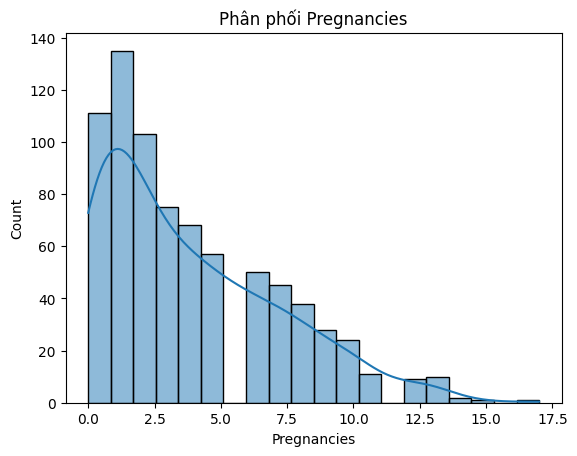

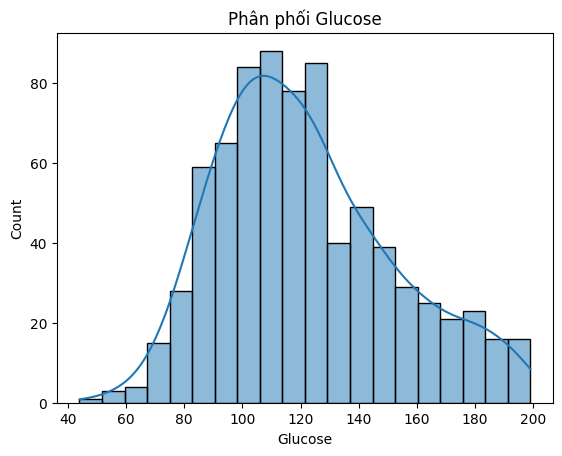

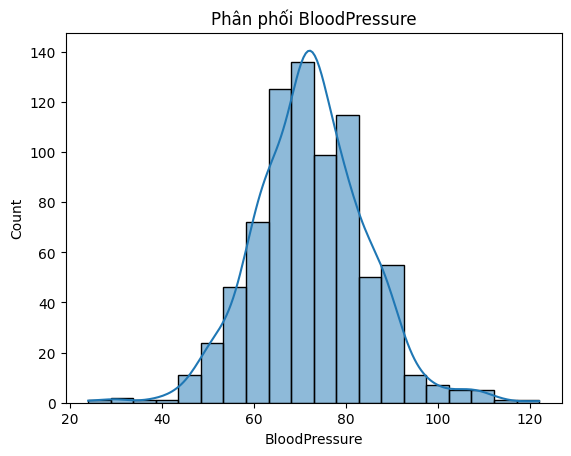

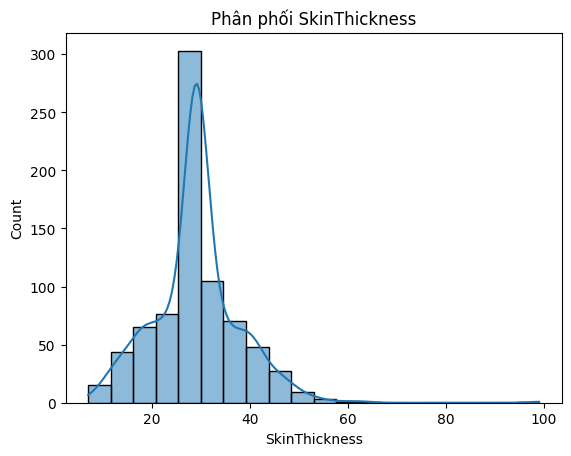

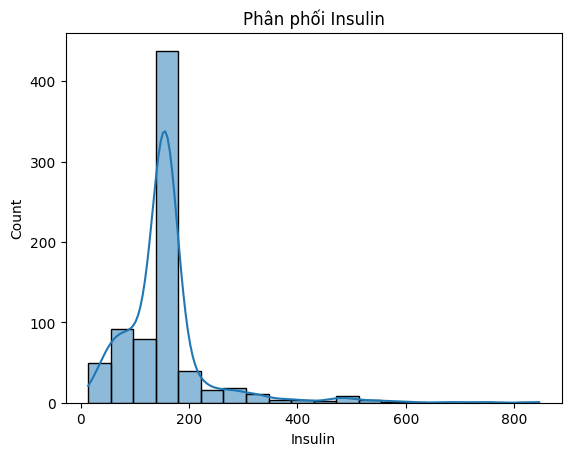

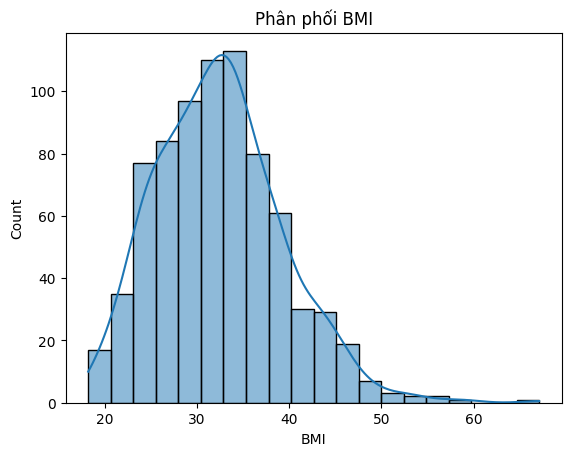

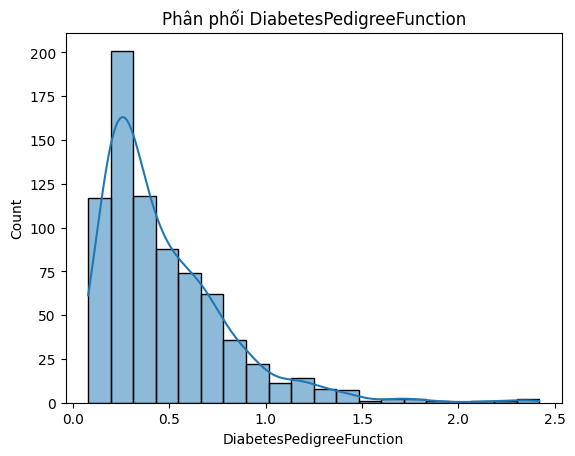

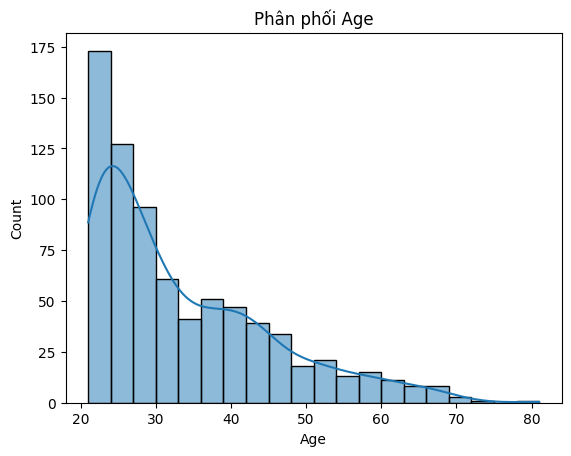

In [ ]:
for col in cols:
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Phân phối {col}')
    plt.show()

### 2.Boxplot và Violinplot

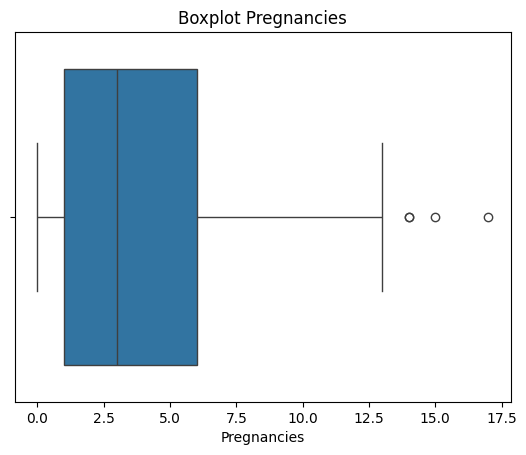

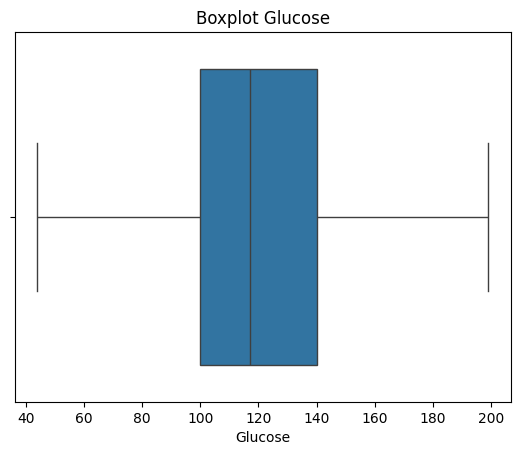

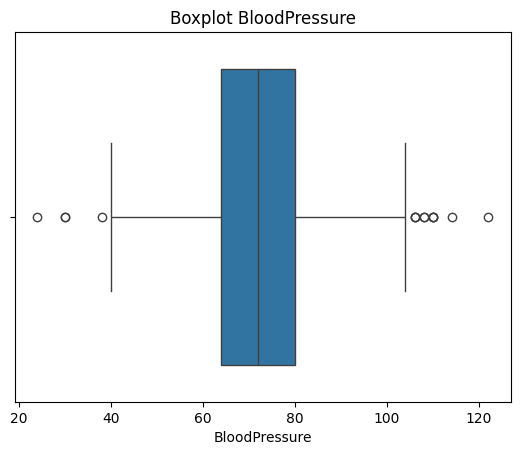

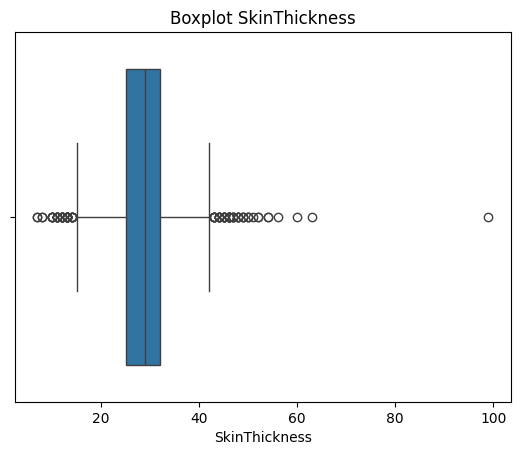

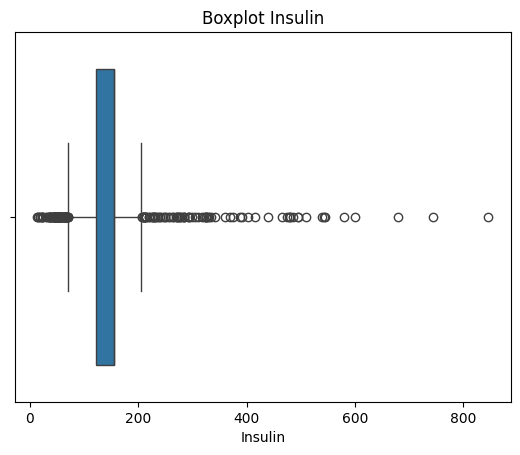

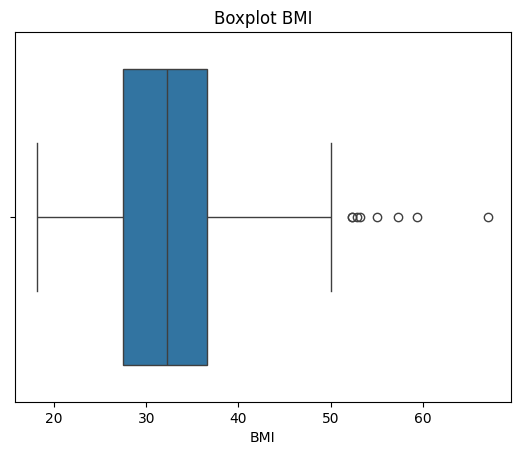

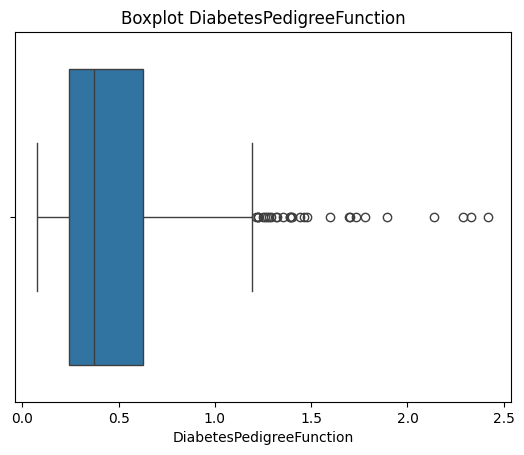

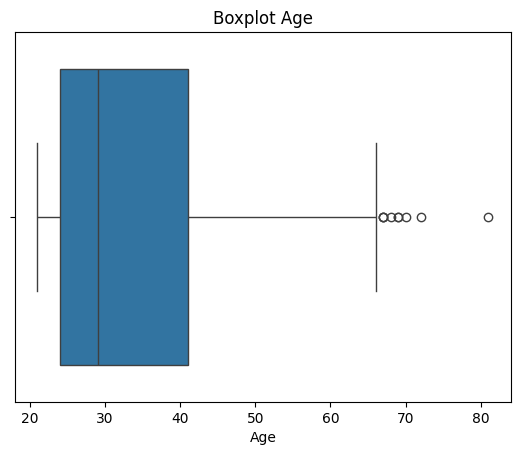

In [ ]:
for col in cols:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot {col}')
    plt.show()

## 7.So sánh với Outcome

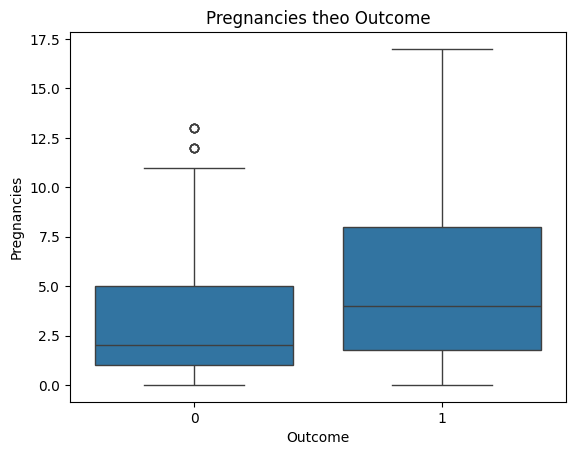

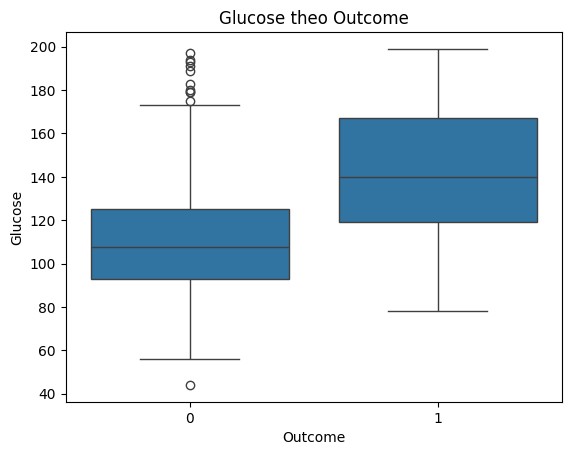

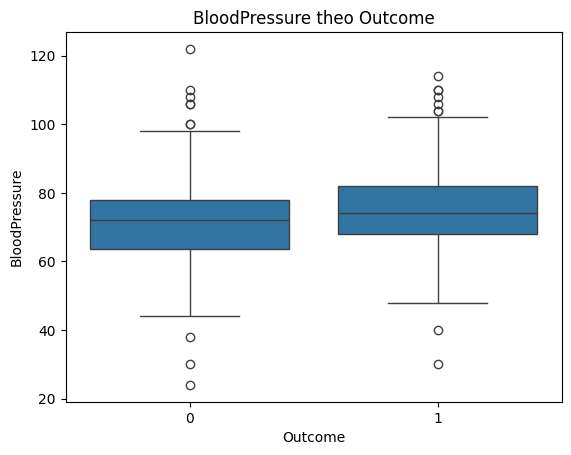

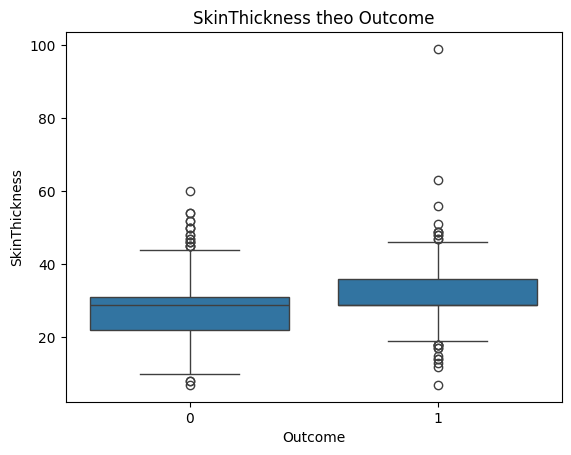

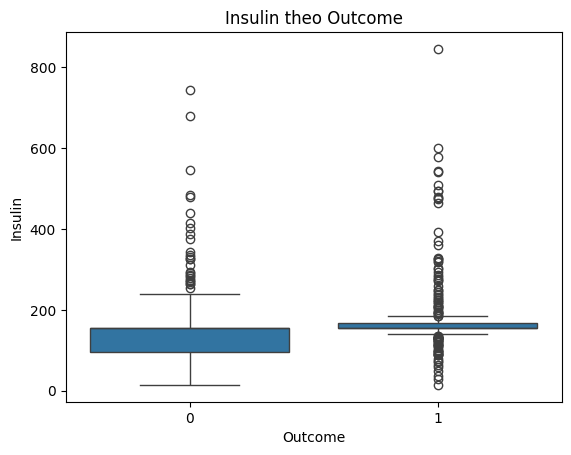

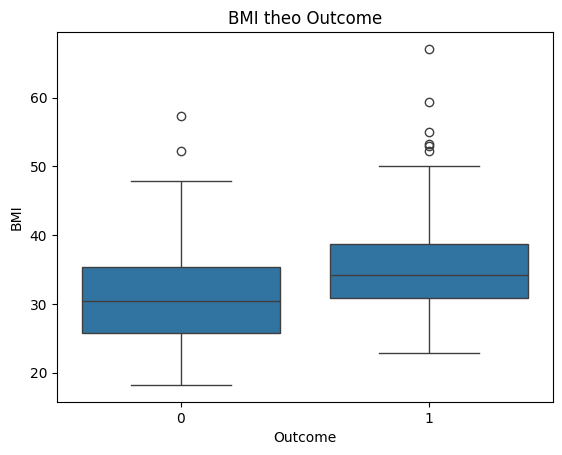

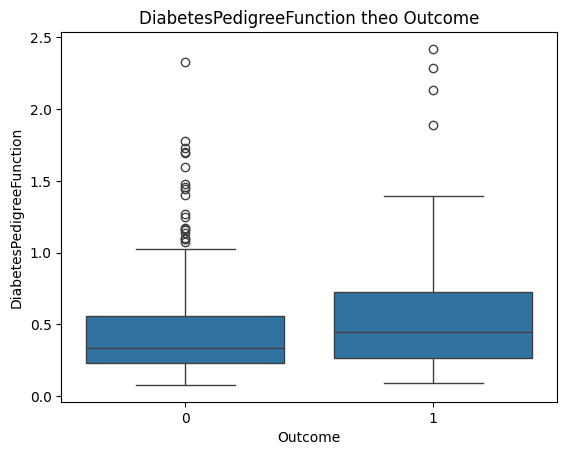

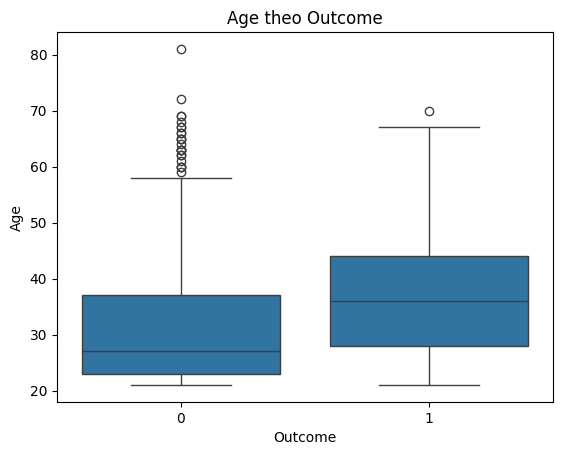

In [ ]:
# 7. So sánh với Outcome
for col in cols:
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'{col} theo Outcome')
    plt.show()


## 8.Bảng thống kê tổng hợp

In [ ]:
# 8. Bảng thống kê tổng hợp
desc_stats = data.describe().T
desc_stats['IQR'] = desc_stats['75%'] - desc_stats['25%']
desc_stats


,count,mean,std,min,25%,50%,75%,max,IQR
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00,5.000000
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.000000,140.250000,199.00,40.500000
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.000000,80.000000,122.00,16.000000
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.000000,99.00,7.000000
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00,34.048223
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.600000,67.10,9.100000
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42,0.382500
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00,17.000000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00,1.000000


## 9.Bảng thống kê tổng hợp

## 9. Kết luận

Qua quá trình thống kê mô tả dữ liệu **Pima Indians Diabetes Dataset**, chúng ta có một số nhận xét quan trọng:

1. **Hiểu dữ liệu**:  
   - Dataset có 768 bản ghi với 8 biến độc lập và 1 biến mục tiêu (Outcome).  
   - Các biến độc lập bao gồm: số lần mang thai, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction và Age.  
   - Biến mục tiêu Outcome phân loại bệnh nhân thành 0 (không tiểu đường) và 1 (có tiểu đường).

2. **Giá trị thiếu và outlier**:  
   - Một số biến như Glucose, BloodPressure, SkinThickness, Insulin, BMI có giá trị bằng 0, được coi là missing value.  
   - Chúng ta đã xử lý bằng cách điền median hoặc mean phù hợp, đảm bảo dữ liệu đầy đủ để tiến hành phân tích.  
   - Boxplot và thống kê IQR giúp phát hiện các outlier tiềm ẩn, những điểm cực đoan này có thể ảnh hưởng đến mô hình nếu không xử lý.

3. **Phân phối dữ liệu**:  
   - Histogram và KDE cho thấy các biến có phân phối khác nhau: một số gần chuẩn (Age, DiabetesPedigreeFunction), một số lệch phải (Insulin, Glucose).  
   - Sự khác biệt này có ý nghĩa khi áp dụng các thuật toán Machine Learning: cần chuẩn hóa hoặc log-transform với những biến lệch mạnh.

4. **So sánh theo Outcome**:  
   - Biến Glucose, BMI, Age có sự khác biệt rõ rệt giữa nhóm Outcome = 0 và Outcome = 1.  
   - Điều này cho thấy những biến này có khả năng dự báo nguy cơ tiểu đường tốt và nên được ưu tiên khi xây dựng mô hình.

5. **Tầm quan trọng cho bước Machine Learning tiếp theo**:  
   - Bước thống kê mô tả này giúp lựa chọn biến, phát hiện dữ liệu bất thường, chuẩn hóa dữ liệu trước khi huấn luyện mô hình.  
   - Nó cũng cung cấp thông tin ban đầu để tạo các feature mới, cải thiện hiệu suất dự đoán của các thuật toán như LightGBM, KNN, hay các ensemble methods.

**Tóm lại**, thống kê mô tả là bước **cơ bản nhưng cực kỳ quan trọng** trong quá trình Data Analysis. Nó giúp chúng ta hiểu rõ dữ liệu, phát hiện vấn đề tiềm ẩn và chuẩn bị tốt cho các bước Machine Learning tiếp theo, từ đó nâng cao khả năng dự đoán chính xác và đáng tin cậy.
